<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>



The hour hand moves at the rate of 0.5 degrees per minute
The minute and second hands moves at the rate of of 6 degrees per minute


In [284]:
#create the data to plot the clock dial
df = pd.DataFrame()
hr = []
for x in range(0,24):
    hr.append(x+1)

df['hr']=hr
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))


In [285]:
#Function to calculate the coordinates when a clock hand rotates
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [286]:
import datetime
now = datetime.datetime.now()
# print('Minute', now.minute)
# print('Hour', now.hour)
# print('second', now.second)

In [287]:
#Calculate the angle of the hand from 12 'o clock'
minute_hand = now.minute * 6
#Calculate the angle of the hand on the other side of the centre point
minute_hand_opposite = (now.minute+30) * 6

In [288]:
#convert 24 hour to 12 hour
import time
t = time.strptime(str(now.hour), "%H")
timevalue_12hour = time.strftime( "%I", t )

hour_hand = (int(timevalue_12hour)*60+now.minute)*.5

hour_hand_opposite = ((int(timevalue_12hour)*60+now.minute)+360)*.5

In [289]:
seconds_hand = now.second * 6

seconds_hand_opposite = (now.second+30) * 6

In [290]:
# Define midpoint
origin = (0, 0)

#define length of hand by defining point at 12 'o clock'
pointhour = (.75, 0)
pointminute = (1, 0)
pointsecond = (.80, 0)

pointopposite = (.2,0)
pointoppositesec = (.3,0)


In [291]:
# Calculate points for hands
xm, ym = rotate(origin, pointminute, math.radians(minute_hand))

xmo, ymo = rotate(origin, pointopposite, math.radians(minute_hand_opposite))

xh, yh = rotate(origin, pointhour, math.radians(hour_hand))

xho, yho = rotate(origin, pointopposite, math.radians(hour_hand_opposite))

xs, ys = rotate(origin, pointsecond, math.radians(seconds_hand))

xso, yso = rotate(origin, pointoppositesec, math.radians(seconds_hand_opposite))

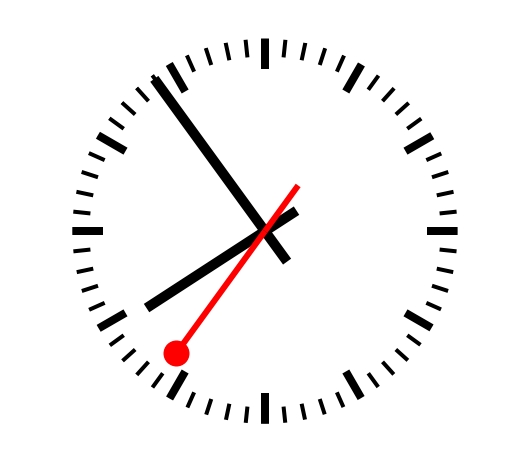

In [329]:
# https://stackoverflow.com/questions/23345565/is-it-possible-to-control-matplotlib-marker-orientation
import matplotlib.pyplot as plt
import matplotlib as mpl
figsize = (4,4)
fig, ax = plt.subplots(figsize=figsize)


ax.add_patch(plt.Circle((0, 0), 1.05, fill=None, ec='white', lw=5, zorder=90))

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.95), (a2*.95), marker=t, s=(figsize[0]/4)*300, c='k')
    
for i in range(1,61):
    angle = (np.array(np.linspace(0,360,61))[i])
    a1, a2  = (np.sin(i*2.*np.pi/60)),np.cos(i*(2.*np.pi/60))
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.98), (a2*.98), marker=t, s=(figsize[0]/4)*80, c='k', lw=2)
    
ax.plot((ym, 0),(xm, 0), lw =(figsize[0]/4)*5, c='black')
ax.plot((ymo, 0),(xmo, 0), lw =(figsize[0]/4)*5, c='black')
# ax.plot((0, 0),(0.8, 0), lw =5, c='black')
ax.plot((yh, 0),(xh,0), lw =(figsize[0]/4)*5, c='black')
ax.plot((yho, 0),(xho,0), lw =(figsize[0]/4)*5, c='black')
ax.scatter(0,0, c= 'red')


ax.plot((ys, 0),(xs,0), lw =(figsize[0]/4)*3, marker='o',c='red', markevery=-1, markersize=(figsize[0]/4)*12)
ax.plot((yso, 0),(xso,0), lw =(figsize[0]/4)*3,c='red')

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.axis('off')
plt.show()

In [305]:
 mlp.rcParams

/anaconda3/lib/python3.6/site-packages/IPython/lib/pretty.py:697: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  output = repr(obj)


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '#f0f0f0',
          'axes.facecolor': '#f0f0f0',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes

6

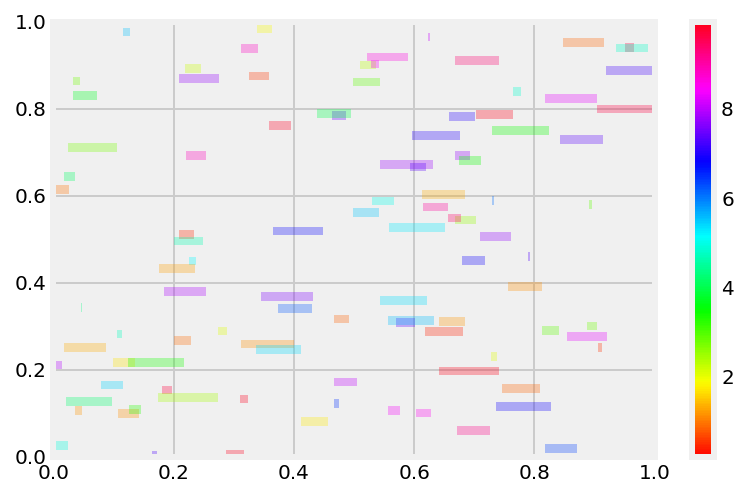

In [322]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

n = 100

# Get your xy data points, which are the centers of the rectangles.
xy = np.random.rand(n,2)

# Set a fixed height
height = 0.02
# The variable widths of the rectangles
widths = np.random.rand(n)*0.1

# Get a color map and make some colors
cmap = plt.cm.hsv
colors = np.random.rand(n)*10.
# Make a normalized array of colors
colors_norm = colors/colors.max()
# Here's where you have to make a ScalarMappable with the colormap
mappable = plt.cm.ScalarMappable(cmap=cmap)
# Give it your non-normalized color data
mappable.set_array(colors)

rects = []
for p, w in zip(xy, widths):
    xpos = p[0] - w/2 # The x position will be half the width from the center
    ypos = p[1] - height/2 # same for the y position, but with height
    rect = Rectangle( (xpos, ypos), w, height ) # Create a rectangle
    rects.append(rect) # Add the rectangle patch to our list

# Create a collection from the rectangles
col = PatchCollection(rects)
# set the alpha for all rectangles
col.set_alpha(0.3)
# Set the colors using the colormap
col.set_facecolor( cmap(colors_norm) )
# No lines
col.set_linewidth( 0 )
#col.set_edgecolor( 'none' )

# Make a figure and add the collection to the axis.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.add_collection(col)
# Add your ScalarMappable to a figure colorbar
fig.colorbar(mappable)
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

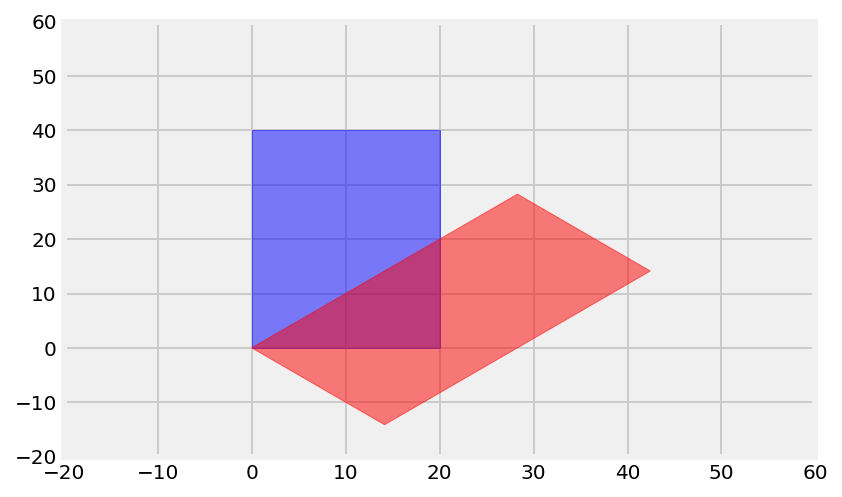

In [324]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111)

r1 = patches.Rectangle((0,0), 20, 40, color="blue", alpha=0.50)
r2 = patches.Rectangle((0,0), 20, 40, color="red",  alpha=0.50)

t2 = mpl.transforms.Affine2D().rotate_deg(-45) + ax.transData
r2.set_transform(t2)

ax.add_patch(r1)
ax.add_patch(r2)

plt.xlim(-20, 60)
plt.ylim(-20, 60)

plt.grid(True)
plt.axes('equal')

plt.show()